# Hawaii Airbbnb Rental Listings Analysis

I will perform an exploratory analysis of the Airbnb dataset sourced from the Inside Airbnb website to understand the rental landscape in Hawaii through various static and interactive visualisations. The source data is from http://insideairbnb.com/get-the-data.html

Contents includes:

1. load data
3. data cleansing
3. exploratory analysis
4. data visualization

## Load data

In [1]:
import requests
url = 'http://data.insideairbnb.com/united-states/hi/hawaii/2021-02-10/data/listings.csv.gz'
html = requests.get(url)

# method 1
# with open('listings.csv.gz', 'wb') as r: 
#     r.write(html.content)
http://data.insideairbnb.com/belgium/vlg/antwerp/2021-02-25/visualisations/reviews.csv
# method 2
import wget
wget.download(url)

'listings.csv.gz'

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# pd.set_option('display.max_rows', 10)
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('listings.csv.gz', compression='gzip', header=0, sep=',', quotechar='"')

In [4]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5269,https://www.airbnb.com/rooms/5269,20210210181214,2021-02-14,Upcountry Hospitality in the 'Auwai Suite,"The 'Auwai Suite is a lovely, self-contained a...","We are located on the ""sunny side"" of Waimea, ...",https://a0.muscache.com/pictures/5b52b72f-5a09...,7620,https://www.airbnb.com/users/show/7620,...,10.0,10.0,10.0,119-269-5808-01R,f,4,4,0,0,0.09
1,5387,https://www.airbnb.com/rooms/5387,20210210181214,2021-02-14,Hale Koa Studio & 1 Bedroom Units!!,This Wonderful Spacious Studio apt/flat is in ...,IN a Farm belt area with small commercial farm...,https://a0.muscache.com/pictures/1170713/dca6a...,7878,https://www.airbnb.com/users/show/7878,...,10.0,10.0,9.0,NaN,t,3,3,0,0,1.25
2,5389,https://www.airbnb.com/rooms/5389,20210210181214,2021-02-13,Keauhou Villa,It is less than 10 minute walk to the Keauhou ...,It is less than 10 minute walk to the Keauhou ...,https://a0.muscache.com/pictures/15520396/3b89...,7878,https://www.airbnb.com/users/show/7878,...,10.0,10.0,9.0,NaN,f,3,3,0,0,0.26
3,5434,https://www.airbnb.com/rooms/5434,20210210181214,2021-02-13,Kauai Ocean View 3 Story Tiki Tower Princeville,"Hawaiian architecture , post and beam construc...",The resort community of Princeville has many t...,https://a0.muscache.com/pictures/miso/Hosting-...,7984,https://www.airbnb.com/users/show/7984,...,10.0,10.0,9.0,540050300023,f,2,2,0,0,0.78
4,7896,https://www.airbnb.com/rooms/7896,20210210181214,2021-02-13,"Beachfront Maui Sunset Condo, Kihei/Wailea","GREAT VALUE ON THE BEACH! Remodeled Condo, Tas...",Conveniently located to all the sights on the ...,https://a0.muscache.com/pictures/26282/e86e740...,21844,https://www.airbnb.com/users/show/21844,...,10.0,9.0,9.0,Hawaii Tax ID# W59502814-01,f,1,1,0,0,0.22


### Summary of the listing dataset

In [5]:
# list data range
df.host_since.sort_values()

8581     2008-07-21
8819     2008-07-21
8818     2008-07-21
8816     2008-07-21
8785     2008-07-21
            ...    
21909    2021-02-06
1238            NaN
3563            NaN
8687            NaN
16807           NaN
Name: host_since, Length: 22031, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22031 entries, 0 to 22030
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            22031 non-null  int64  
 1   listing_url                                   22031 non-null  object 
 2   scrape_id                                     22031 non-null  int64  
 3   last_scraped                                  22031 non-null  object 
 4   name                                          22031 non-null  object 
 5   description                                   21766 non-null  object 
 6   neighborhood_overview                         12672 non-null  object 
 7   picture_url                                   22031 non-null  object 
 8   host_id                                       22031 non-null  int64  
 9   host_url                                      22031 non-null 

## Statistics of the attributes

In [7]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.203100e+04,2.203100e+04,2.203100e+04,22027.000000,22027.000000,22031.000000,22031.000000,22031.000000,0.0,18901.000000,...,16138.000000,16135.000000,16137.000000,16135.000000,16134.000000,22031.000000,22031.000000,22031.000000,22031.000000,16319.000000
mean,2.792552e+07,2.021021e+13,1.010386e+08,85.231716,85.231716,20.866430,-157.097748,4.623031,NaN,1.788530,...,9.530487,9.783204,9.748404,9.831670,9.419115,53.750397,53.029368,0.648132,0.017884,0.944049
std,1.359693e+07,0.000000e+00,9.508441e+07,242.160900,242.160900,0.768195,1.204352,2.321154,NaN,1.054438,...,0.870833,0.708099,0.754696,0.544124,0.897663,91.689678,91.940339,2.908019,0.271590,1.075211
min,5.269000e+03,2.021021e+13,9.080000e+02,0.000000,0.000000,18.928570,-159.716590,0.000000,NaN,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.758891e+07,2.021021e+13,2.263514e+07,2.000000,2.000000,20.690580,-157.833150,3.000000,NaN,1.000000,...,9.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.000000,0.000000,0.000000,0.190000
50%,2.876834e+07,2.021021e+13,7.274568e+07,9.000000,9.000000,20.948880,-156.687230,4.000000,NaN,2.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,8.000000,0.000000,0.000000,0.570000
75%,4.022930e+07,2.021021e+13,1.485012e+08,81.000000,81.000000,21.286475,-156.434940,6.000000,NaN,2.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,65.000000,65.000000,0.000000,0.000000,1.330000
max,4.811418e+07,2.021021e+13,3.875555e+08,7235.000000,7235.000000,22.228840,-154.822990,16.000000,NaN,17.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,476.000000,476.000000,39.000000,6.000000,15.470000


## Check null values

In [8]:
print("\nMissing Value    :",df.isnull().sum().sum())
print("\nColumns with missing value:\n",df.isnull().any())


Missing Value    : 145873

Columns with missing value:
 id                                              False
listing_url                                     False
scrape_id                                       False
last_scraped                                    False
name                                            False
                                                ...  
calculated_host_listings_count                  False
calculated_host_listings_count_entire_homes     False
calculated_host_listings_count_private_rooms    False
calculated_host_listings_count_shared_rooms     False
reviews_per_month                                True
Length: 74, dtype: bool


In [28]:
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = df.isna().sum().sort_values(ascending = False)
missing__data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent %', "Missing Count"])
missing__data.head(40)

,Percent %,Missing Count
bathrooms,100.00,22031
calendar_updated,100.00,22031
neighbourhood,42.48,9359
neighborhood_overview,42.48,9359
license,32.46,7152
host_about,27.05,5960
review_scores_value,26.77,5897
review_scores_checkin,26.76,5896
review_scores_location,26.76,5896
review_scores_communication,26.75,5894


In [31]:
df.neighbourhood_group_cleansed.isnull().sum()

0

## Data cleansing

In [9]:
# Convert price string into float
df['price_dollar'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

## Exploration Data Analysis and Visualizing
Now time to explore our data and visualize it to recognize the relationship between the dataset.

## Neighbourhood Group

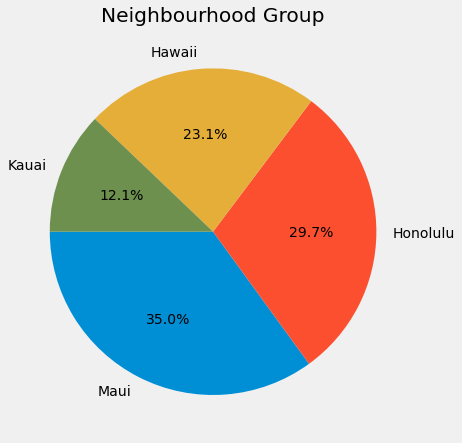

In [10]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
g = plt.pie(df.neighbourhood_group_cleansed.value_counts(), labels=df.neighbourhood_group_cleansed.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

The pie chart above shows that Airbnb Listings in Hawaii are in Honolulu, Kauai and Maui, and Maui has the highest share of hotels. We also know that from this map of Neighborhood Group.

## Map of neighbourhood group

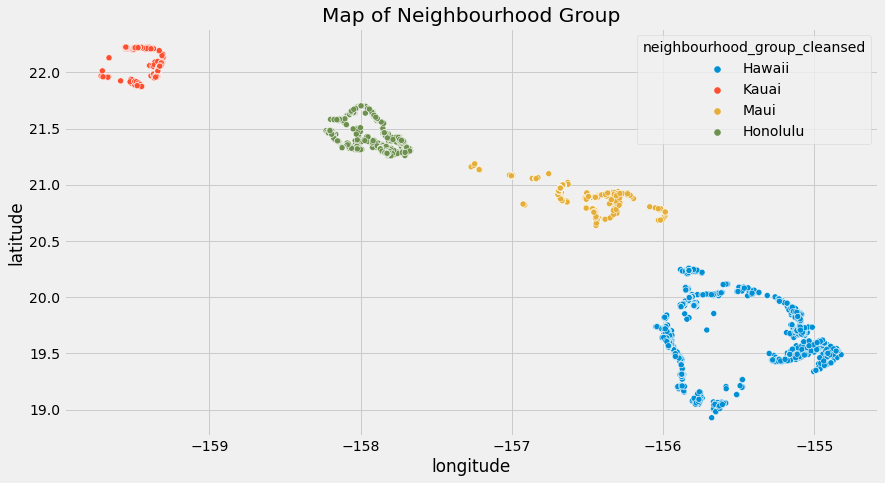

In [11]:
# Map of neighbourhood group
plt.figure(figsize=(13,7))
plt.title("Map of Neighbourhood Group")
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group_cleansed)
plt.ioff()
plt.show()

## Room Type Distribution

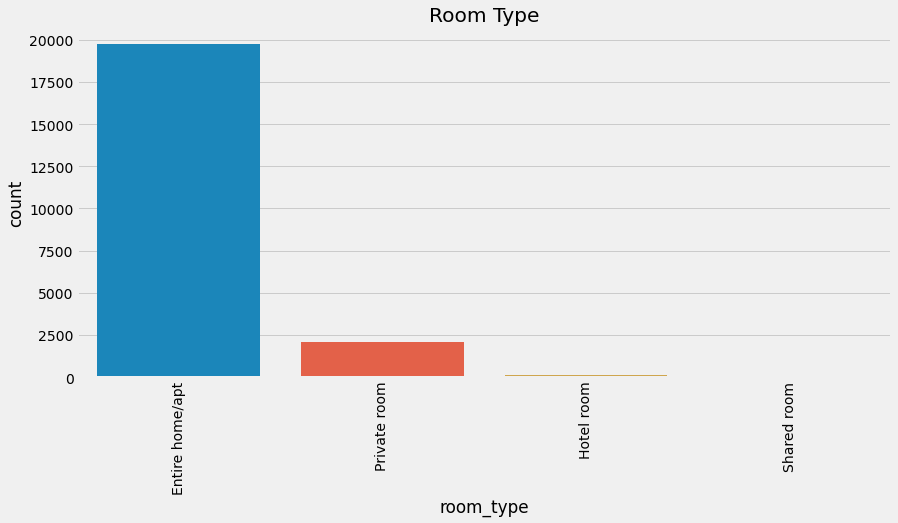

In [12]:
plt.figure(figsize=(13,6))
sns.countplot(x='room_type', data=df);
plt.title('Room Type');
plt.xticks(rotation=90);

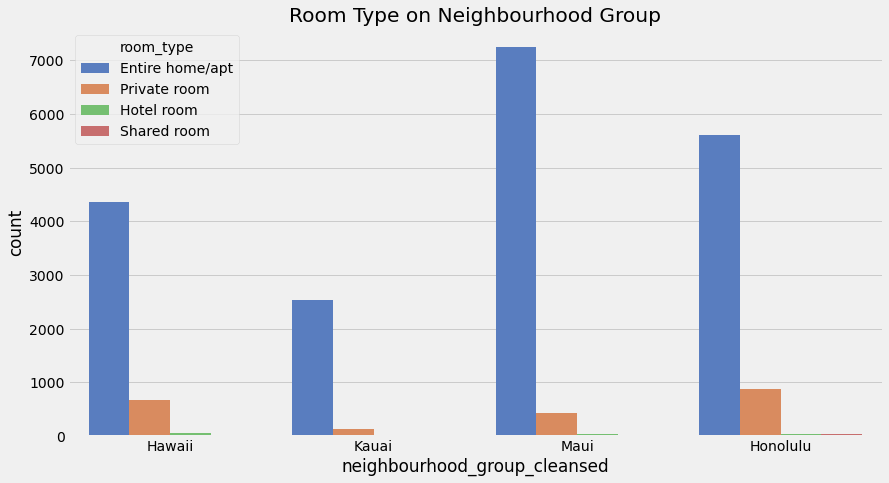

In [13]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(df.neighbourhood_group_cleansed, hue=df.room_type, palette="muted")
plt.show()

## Neighbourhood Group Price Distribution


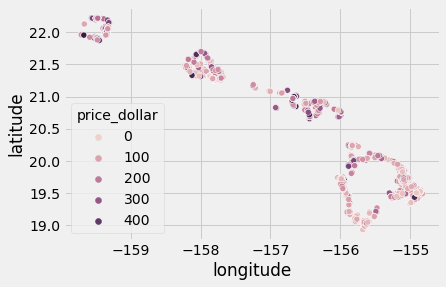

In [14]:
sns.scatterplot(data=df[df.price_dollar<500], x='longitude',y='latitude', hue='price_dollar');

In [15]:
# draw boxplot

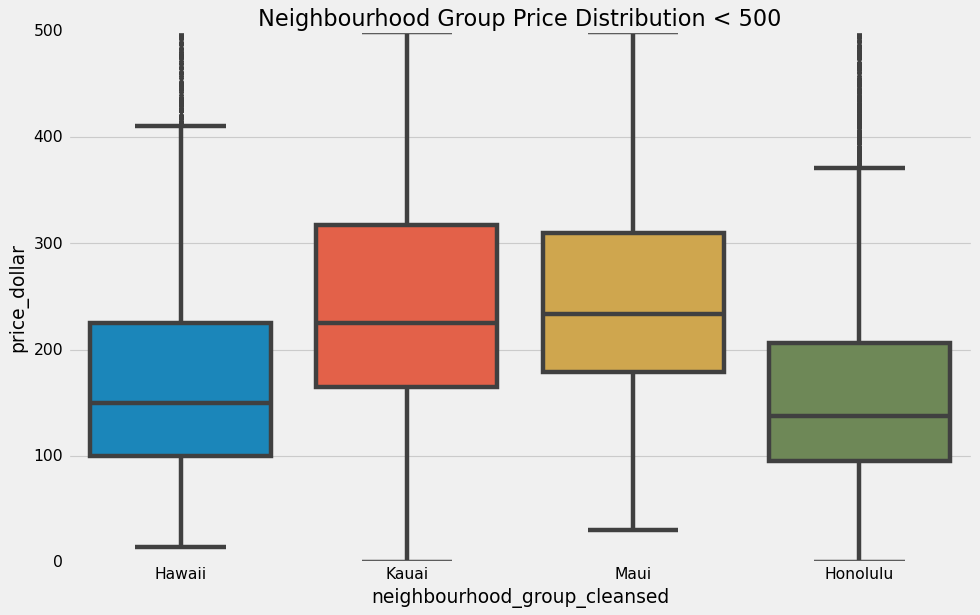

In [42]:
plt.figure(figsize=(13,8))
plt.title("Neighbourhood Group Price Distribution < 500")
sns.boxplot(y="price_dollar",x ='neighbourhood_group_cleansed' ,data = df[df.price_dollar<500])
plt.show()

From the boxplot above, we can definitely observe a couple of things about the distribution of prices for Airbnb in Hawaii.
We can see that Kauai and Maui has the high range price for the listings with about $220 as an average price.
Honolulu has the cheapest average price among all.

## Property Type Distribution (top 10)

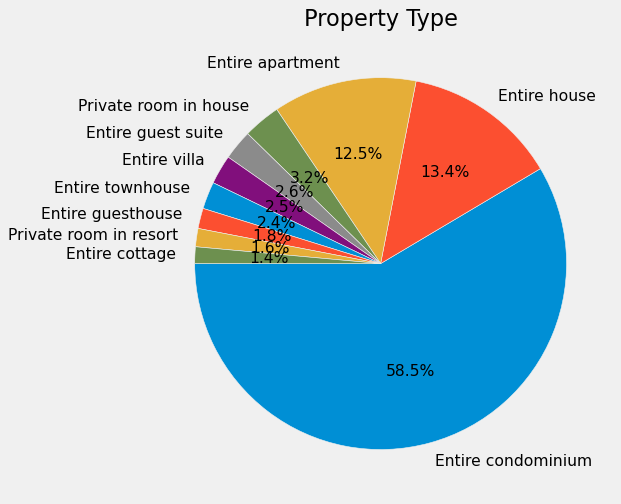

In [38]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Property Type")
g = plt.pie(df.property_type.value_counts().head(10), labels=df.property_type.value_counts().head(10).index,autopct='%1.1f%%', startangle=180)
plt.show()

## Reviews

In [17]:
df.review_scores_rating

0        88.0
1        93.0
2        97.0
3        95.0
4        90.0
         ... 
22026     NaN
22027     NaN
22028     NaN
22029     NaN
22030     NaN
Name: review_scores_rating, Length: 22031, dtype: float64

## Review Scores among all neighbourhood groups

In [61]:
review_dict = {}
nei = ["Maui", "Kauai", "Hawaii", "Honolulu"]
for i in nei:
    review_dict[i] = df[df.neighbourhood_group_cleansed == i].review_scores_rating

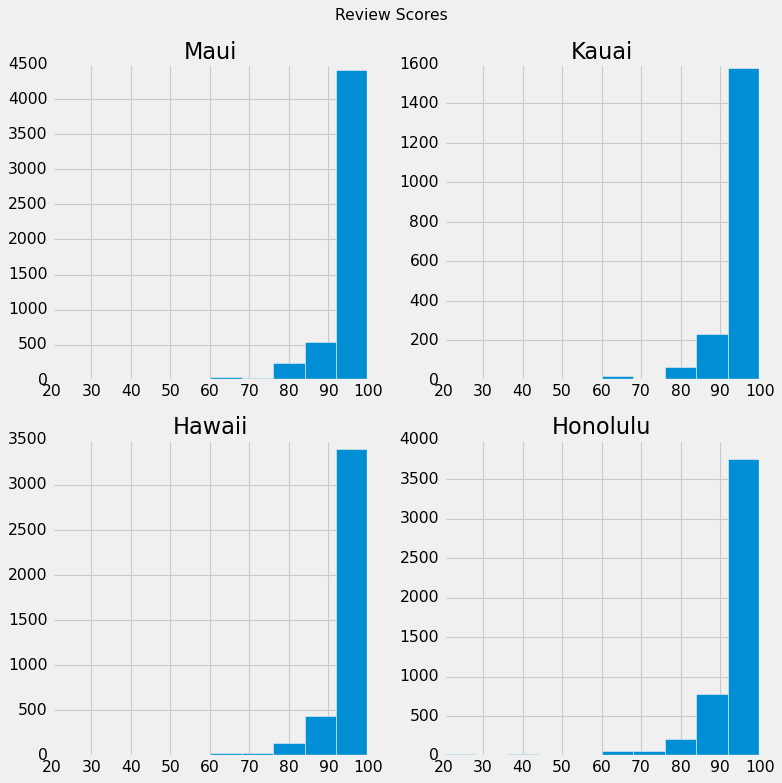

In [70]:
counter = 1
plt.subplots(2,2,figsize=(10,10))
for key, value in review_dict.items():
    label = f'{key}'
    plt.subplot(2,2,counter)
    plt.hist(value)
    plt.title(label)
    counter += 1
plt.suptitle('Review Scores')
plt.tight_layout()
plt.show()

In [ ]:
n_rows = 2
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols)
for row_num in range(n_rows):
    for col_num in range(n_cols):
        ax = axes[row_num][col_num]
        ax.plot(np.random.rand(20))
        ax.set_title(f'Plot ({row_num+1}, {col_num+1})')
fig.suptitle('Main title')
fig.tight_layout()
plt.show()

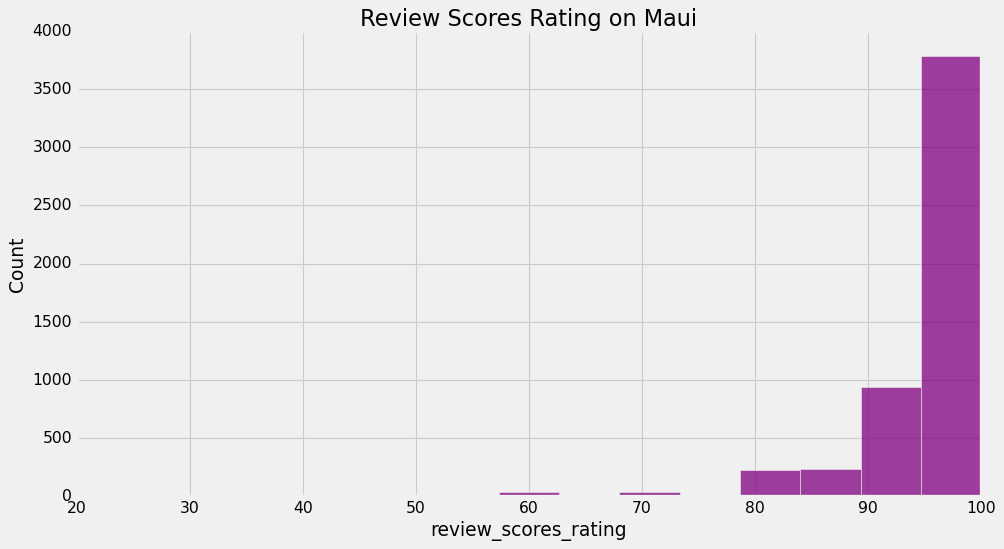

In [56]:
plt.figure(figsize=(13,7))
plt.title("Review Scores Rating on Maui")
sns.histplot(df[df.neighbourhood_group_cleansed == "Maui"].review_scores_rating, palette="muted", bins = 15, color = 'purple')
plt.show()

## Top listing words

Next, we will explore deeper on the property detail by finding out what the most used word in the listing name. The most used word could represent the selling value of their property for the prospective guests. First, we will create a function to collect the words.

In [20]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['names_without_stopwords'] = df['name'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['names_without_stopwords'] 

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                       Upcountry Hospitality 'Auwai Suite
1                      Hale Koa Studio & 1 Bedroom Units!!
2                                            Keauhou Villa
3          Kauai Ocean View 3 Story Tiki Tower Princeville
4               Beachfront Maui Sunset Condo, Kihei/Wailea
                               ...                        
22026    OCEAN VIEW! Lovely Studio Close Kahana Beach |...
22027    Perfect Location! Spacious Getaway Garden View...
22028    Sunny Getaway! Relaxing Villa Garden View | Cl...
22029    Near Waikoloa Beach! Spacious Bright Condo Gol...
22030    Spacious Villa Near Waikoloa Beach | Air-Condi...
Name: names_without_stopwords, Length: 22031, dtype: object

In [21]:
#Crete empty list where we are going to put the name strings
names=[]
#Getting name string from 'name' column and appending it to the empty list
for name in df.names_without_stopwords:
    names.append(name)
#Setting a function to split name strings into seperate words
def split_name(name):
    s = str(name).split()
    return s
#Create empty list where we are going to count the words
names_count = []
#Getting name string to appending it to the names_count list
for n in names:
    for word in split_name(n):
        word = word.lower()
        names_count.append(word)

In [22]:
skip_words = ["&", "1", "2", "3", ",", "w/", "-", "the"]

In [23]:
for n in names_count:
    if n in skip_words:
        names_count.remove(n)

We need to import counter library to count and generate raw data which contains the top 25 words used by the host


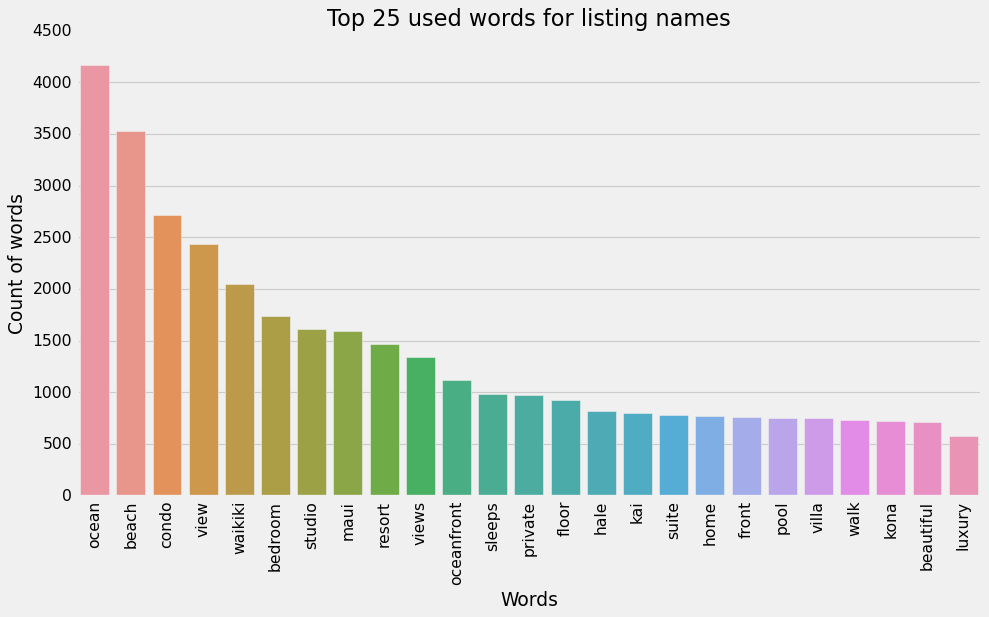

In [72]:
from collections import Counter
top_25 = Counter(names_count).most_common()
top_25 = top_25[:25]
plt.figure(figsize=(13,7))
# Then, we convert the data into DataFrame and visualize our findings
word_count_data = pd.DataFrame(top_25)
word_count_data.rename(columns={0:'Words',1:'Counts'},inplace=True)
viz_count = sns.barplot(x='Words',y='Counts', data = word_count_data)
viz_count.set_title('Top 25 used words for listing names')
viz_count.set_ylabel('Count of words')
viz_count.set_xlabel('Words')
viz_count.set_xticklabels(viz_count.get_xticklabels(),rotation = 90);

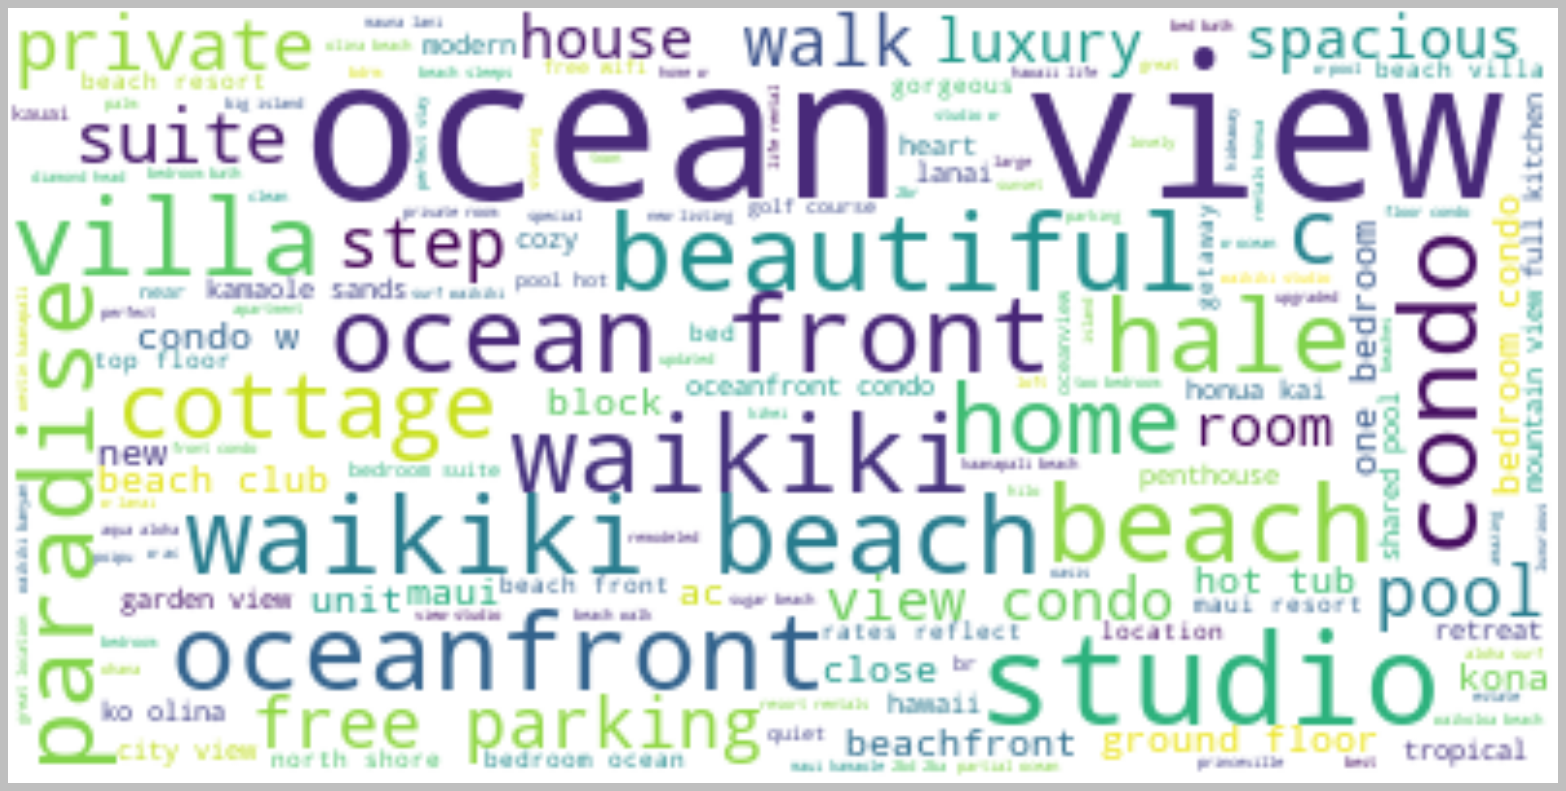

<Figure size 640x480 with 0 Axes>

In [25]:
from wordcloud import WordCloud, ImageColorGenerator
text = ' '.join(str(n).lower() for n in df.name)
#Generate wordcloud image
wordcloud = WordCloud(max_words=200, background_color = 'white').generate(text)
plt.figure(figsize=(25,20))
#Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('wordcloud.png')